In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [2]:
df = pd.read_csv("Stars.csv")

In [3]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


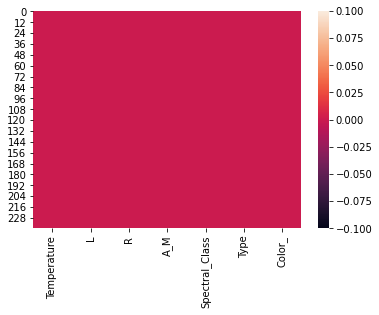

In [27]:
sns.heatmap(df.isnull());

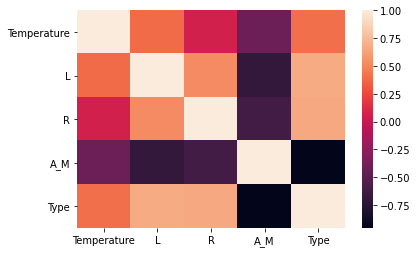

In [7]:
sns.heatmap(df.corr());

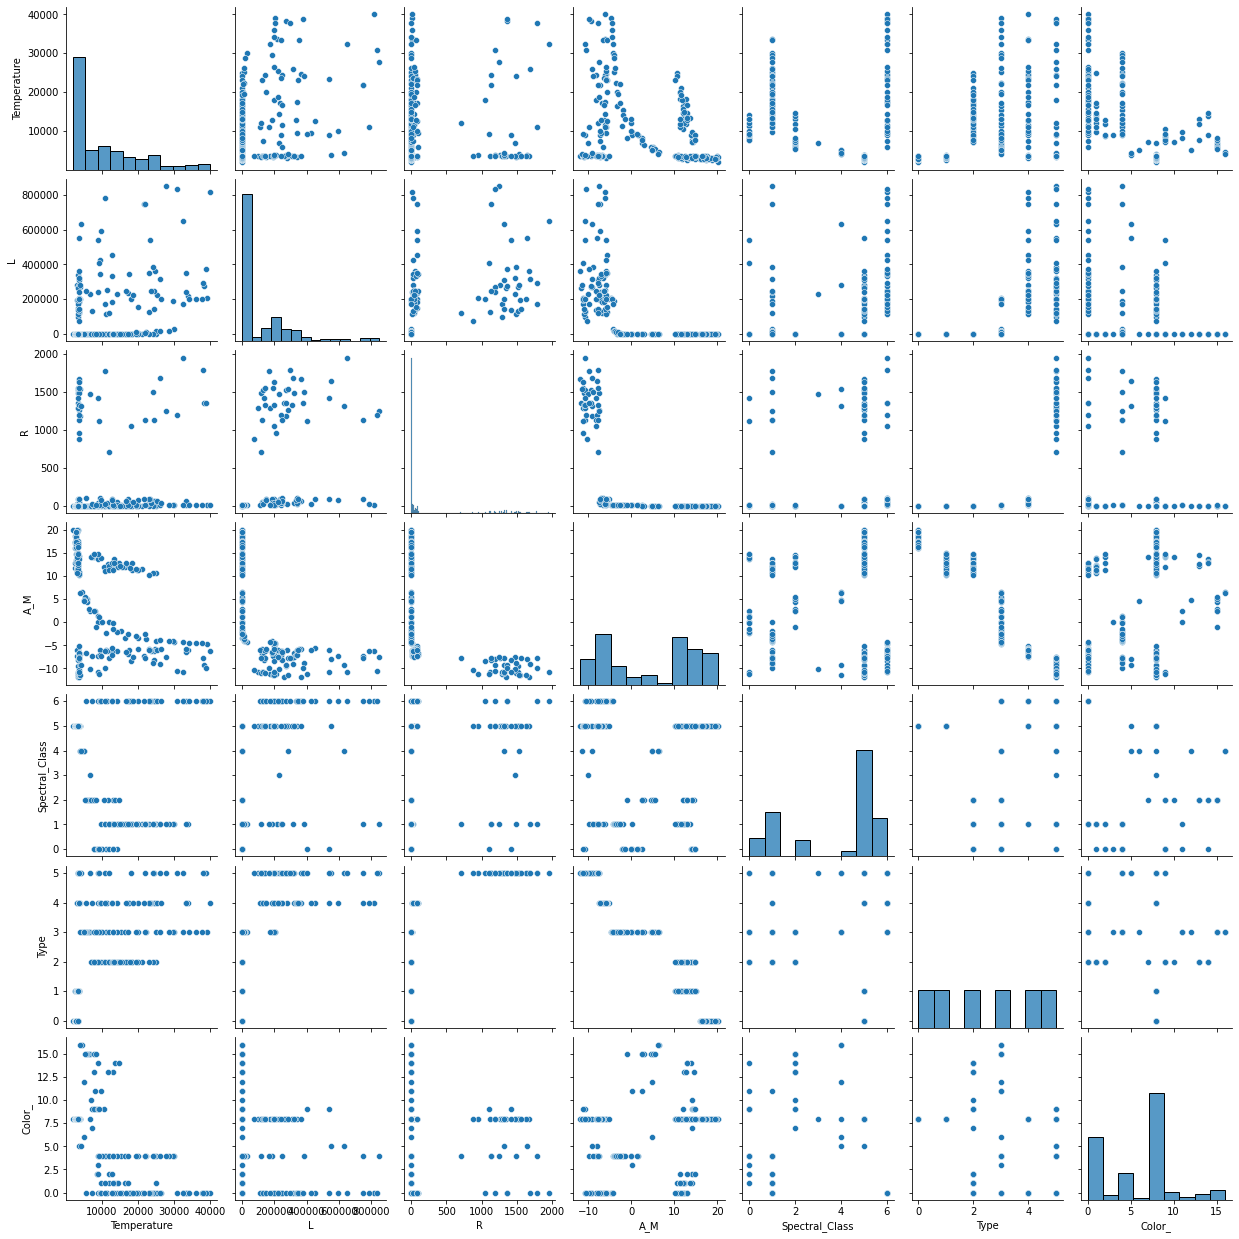

In [63]:
sns.pairplot(df);

In [8]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [17]:
df['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

In [20]:
df['Color_'] = LabelEncoder().fit_transform(df['Color'])

In [24]:
df.drop('Color', axis=1, inplace=True)

In [25]:
df['Spectral_Class'] = LabelEncoder().fit_transform(df['Spectral_Class'])

In [26]:
df.head()

,Temperature,L,R,A_M,Spectral_Class,Type,Color_
0,3068,0.002400,0.1700,16.12,5,0,8
1,3042,0.000500,0.1542,16.60,5,0,8
2,2600,0.000300,0.1020,18.70,5,0,8
3,2800,0.000200,0.1600,16.65,5,0,8
4,1939,0.000138,0.1030,20.06,5,0,8


In [30]:
x = df[['Temperature', 'L', "R", "A_M", "Spectral_Class", "Color_"]]
y = df[["Type"]]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
df.shape

(240, 7)

# Machine Learning Model

In [37]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [38]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/home/marlon/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/marlon/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
predict_lr = lr.predict(x_test)

In [40]:
lrn = LinearRegression()
lrn.fit(x_train, y_train)

LinearRegression()

In [41]:
predict_lrn = lrn.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score, r2_score

In [62]:
print("{:.2f}%" .format(accuracy_score(predict_lr, y_test)*100))
print("{:.2f}%" .format(r2_score(predict_lrn, y_test)*100))

58.33%
94.86%


In [57]:
predict_lrn.shape

(48, 1)

In [58]:
predict_lr.shape

(48,)

### Regressão Linear > 58.33%
### Regressão Logística > 94.86%

-------------------------------------------------------------------------------------------_

# Rede Neural

In [65]:
df.head()

,Temperature,L,R,A_M,Spectral_Class,Type,Color_
0,3068,0.002400,0.1700,16.12,5,0,8
1,3042,0.000500,0.1542,16.60,5,0,8
2,2600,0.000300,0.1020,18.70,5,0,8
3,2800,0.000200,0.1600,16.65,5,0,8
4,1939,0.000138,0.1030,20.06,5,0,8


In [201]:
x = df[["Temperature", "L", "R", "A_M", "Spectral_Class", "Color_"]].values
y = df[["Type"]].values

In [76]:
x.shape

(240, 6)

In [151]:
df["Type"]

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Type, Length: 240, dtype: int64

In [144]:
df["Type"].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

In [162]:
df.head()

,Temperature,L,R,A_M,Spectral_Class,Type,Color_
0,3068,0.002400,0.1700,16.12,5,0,8
1,3042,0.000500,0.1542,16.60,5,0,8
2,2600,0.000300,0.1020,18.70,5,0,8
3,2800,0.000200,0.1600,16.65,5,0,8
4,1939,0.000138,0.1030,20.06,5,0,8


In [164]:
from keras.utils import np_utils

In [202]:
x = df[["Temperature", "L", "R", "A_M", "Spectral_Class", "Color_"]].values
y = df[["Type"]].values

labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(y)
classe_dummy = np_utils.to_categorical(y)

/home/marlon/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [203]:
x_train, x_test, y_train, y_test = train_test_split(x, classe_dummy, test_size=0.2)

In [204]:
pd.DataFrame(classe_dummy)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
235,0.0,0.0,0.0,0.0,0.0,1.0
236,0.0,0.0,0.0,0.0,0.0,1.0
237,0.0,0.0,0.0,0.0,0.0,1.0
238,0.0,0.0,0.0,0.0,0.0,1.0


### Neural Model

In [77]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [211]:
classificador = Sequential()

classificador.add(Dense(units = 10, activation = 'relu', input_dim = 6))
classificador.add(Dense(units = 10, activation = 'relu'))
classificador.add(Dense(units = 6, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss="categorical_crossentropy",
                      metrics = ['categorical_accuracy'])

In [212]:
classificador.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 10)                70        
_________________________________________________________________
dense_128 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_129 (Dense)            (None, 6)                 66        
Total params: 246
Trainable params: 246
Non-trainable params: 0
_________________________________________________________________


In [213]:
classificador.fit(x_train, y_train, batch_size = 10,
                  epochs = 1000, validation_data=(x_test, y_test))

Epoch 1/1000
20/20 [==============================] - 1s 13ms/step - loss: 24982.4814 - categorical_accuracy: 0.2359 - val_loss: 20308.2402 - val_categorical_accuracy: 0.3125
Epoch 2/1000
20/20 [==============================] - 0s 4ms/step - loss: 15275.9372 - categorical_accuracy: 0.2971 - val_loss: 15941.0420 - val_categorical_accuracy: 0.2917
Epoch 3/1000
20/20 [==============================] - 0s 5ms/step - loss: 11440.9098 - categorical_accuracy: 0.2681 - val_loss: 11883.5869 - val_categorical_accuracy: 0.4792
Epoch 4/1000
20/20 [==============================] - 0s 4ms/step - loss: 7894.8736 - categorical_accuracy: 0.3103 - val_loss: 7574.0278 - val_categorical_accuracy: 0.4375
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 5827.7956 - categorical_accuracy: 0.3517 - val_loss: 3512.5557 - val_categorical_accuracy: 0.2292
Epoch 6/1000
20/20 [==============================] - 0s 4ms/step - loss: 1289.7890 - categorical_accuracy: 0.3130 - val_loss: 1286.9

In [216]:
resultado = classificador.evaluate(x_test, y_test)
previsoes = classificador.predict(x_test)

2/2 [==============================] - 0s 5ms/step - loss: 6.9765 - categorical_accuracy: 0.4167


In [226]:
previsoes = (previsoes > 0.5)

In [228]:
from sklearn.metrics import confusion_matrix

In [229]:
classe_teste2 = [np.argmax(t) for t in y_test]
previsoes2 = [np.argmax(t) for t in x]

<AxesSubplot:>

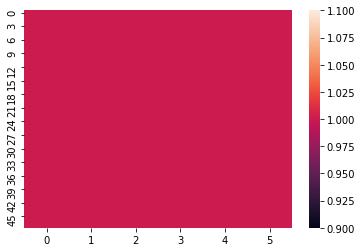

In [232]:
sns.heatmap(previsoes)